# Binary Birth-Death-Fusion
This notebook generates the approximated moment equations for the _Binary Birth-Death-Fusion_ case study of the LPAC paper.
The equations used in the paper belong to a slightly more complex model, including the following transition classes: Intake, binary Exit, Coagulation, Fragmentation, Birth and binary Death.
In the paper the rate constants for the binary Exit and Fragmentation are set to 0.
The paper refers to the Coagulation transition class as Fusion: the two terms are equivalent from our modelling perspective.

The system is defined by the transition classes
$$
\begin{align}
	\emptyset &\xrightarrow{h_I(n; y)} [y] && \text{(Intake)} \notag \\
	[x] + [x'] &\xrightarrow{h_F(n; x,x')} [x + x'] && \text{(Fusion)} \notag \\
	[x] &\xrightarrow{h_b(n; x)} [x+1] && \text{(Birth)} \notag \\
	[x] &\xrightarrow{h_d(n; x)} [x-2] && \text{(Death)} \notag
\end{align}
$$

with propensity functions
\begin{align}
	h_I(n; y) &= k_I \, \pi_I(y) \label{suppeq:bbdc:hI} \\
	h_F(n; x,x') &= k_F \, \frac{n_x \, (n_{x'} - \delta_{x,x'})}{1 + \delta_{x,x'}} \label{suppeq:bbdc:hE} \\
	h_b(n; x) &= k_b \, n_x \label{suppeq:bbdc:hb} \\
	h_d(n; x) &= k_d \, \frac{x \, (x-1)}{2} \, n_x. \label{suppeq:bbdc:hd} 
\end{align}

In [1]:
# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install sympy
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install matplotlib

In [2]:
# Remove matplotlib deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# initialize sympy printing (for latex output)
from sympy import init_printing, Symbol
init_printing()

# import functions and classes for compartment models
import sys
sys.path.insert(0, "./compartor") #use local copy
from compartor import *

# Define shorthands for Moment and Expectation
M, E = Moment, Expectation

In [4]:
x = Content('x')
y = Content('y')
z = Content('z')

from sympy import symbols, log, exp, sin, cos, tan
kM,h = symbols('kM h') # The Michaelis-Menten constant and hill exponent

# define intake distribution
pi_I = OutcomeDistribution.Poisson(Symbol("\pi_{Poiss}(y; \lambda)"), y[0], Symbol("\lambda"))
# define fragmentation distribution
pi_F = OutcomeDistribution.Uniform(Symbol("\pi_F(y|x)"), y[0], 0, x[0])

Birth         = TransitionClass( [x]       -to> [x+1],    'k_b',                     name='b')
Death         = TransitionClass( [x]       -to> [x-1],    'k_d', g=x[0],             name='d')
BiDeath       = TransitionClass( [x]       -to> [x-2],    'k_d', g=x[0]*(x[0]-1)/2,  name='d')

Intake        = TransitionClass( {}         -to> [y],         'k_I',         pi=pi_I, name='I')
Exit          = TransitionClass( [x]        -to> {},          'k_E',                  name='E')
BiExit        = TransitionClass( [x] + [y]  -to> [x],         'k_E',                  name='E')

Coagulation   = TransitionClass( [x] + [y] -to> [x+y],       'k_C',                  name='C')
Fragmentation = TransitionClass( [x]       -to> [y] + [x-y], 'k_F', g=x[0], pi=pi_F, name='F')

# transitions = [Intake, Exit, Birth, Death] # Nested Birth-Death
# transitions = [Intake, BiExit, Birth, BiDeath] # NBDq
# transitions = [Intake, Exit, Coagulation, Fragmentation, Birth, Death] # IECFBD
transitions = [Intake, BiExit, Coagulation, Fragmentation, Birth, BiDeath] # IEqCFBDq

display_transition_classes(transitions)

                     EmptySet ---> [y],  h_I = \pi_{Poiss}(y; \lambda)*k_I                      
  [x] + [y] ---> [x],  h_E = k_E*(n(y) - KroneckerDelta(x, y))*n(x)/(KroneckerDelta(x, y) + 1)  
[x] + [y] ---> [x + y],  h_C = k_C*(n(y) - KroneckerDelta(x, y))*n(x)/(KroneckerDelta(x, y) + 1)
                    [x] ---> [x - y] + [y],  h_F = \pi_F(y|x)*k_F*n(x)*x[0]                     
                              [x] ---> [(1,) + x],  h_b = k_b*n(x)                              
                    [x] ---> [(-2,) + x],  h_d = k_d*(x[0] - 1)*n(x)*x[0]/2                     

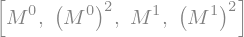

> Compute Moment Equations: computing equations for 4 moments
 [0:00:01.028182]
> Compute Moment Equations: computing equations for 4 moments
 [0:00:04.248674]
> Compute Moment Equations: computing equations for 1 moments
 [0:00:04.012576]
> Automated Moment Equations: #equations=9 [0:00:09.300477]


Computed moment equations for desired moments $\left< N\right> $, $\left< N^{2}\right> $, $\left< M^{1}\right> $, and $\left< {\left(M^{1}\right)}^{\mathtt{\text{2}}}\right> $.

Equations were iteratively added for $\left< M^{1} M^{2}\right> $, $\left< M^{2}\right> $, $\left< N M^{2}\right> $, $\left< N M^{1}\right> $, and $\left< {\left(M^{2}\right)}^{\mathtt{\text{2}}}\right> $.

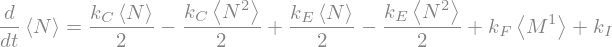

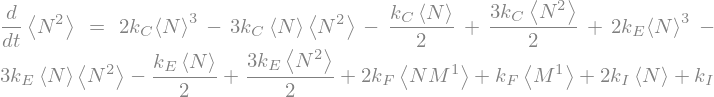

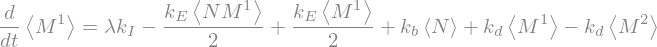

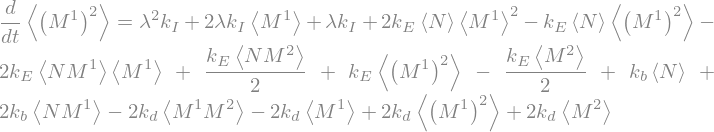

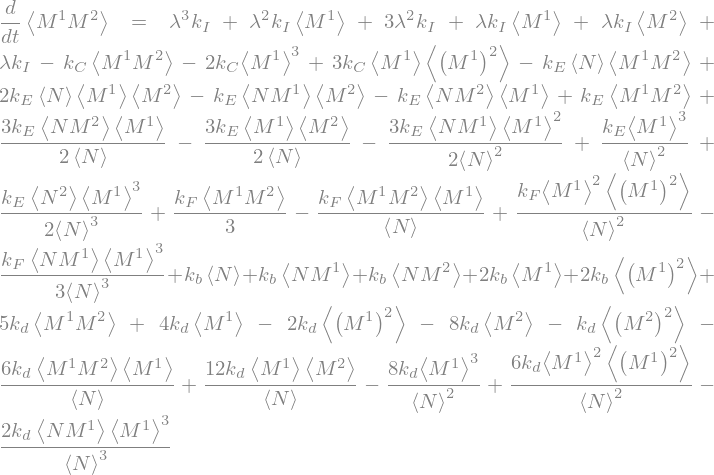

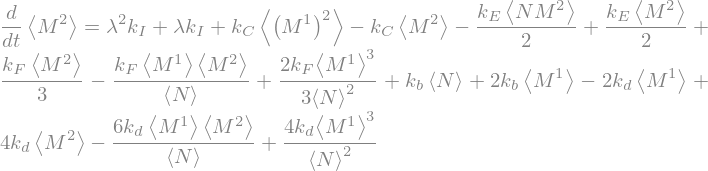

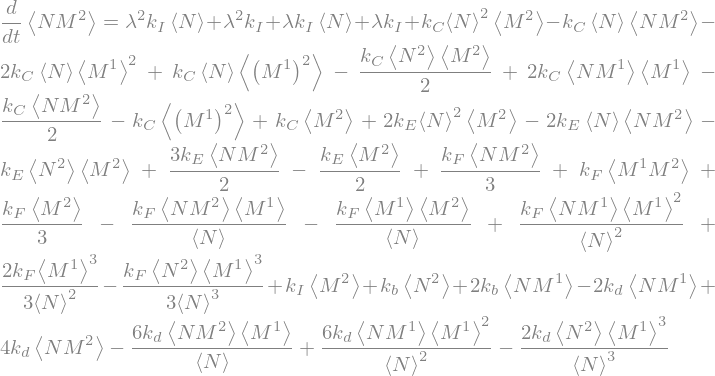

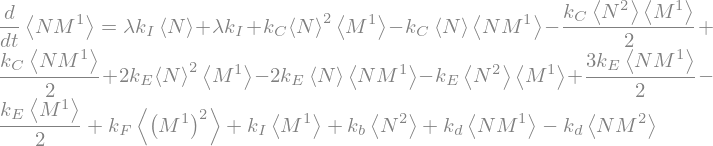

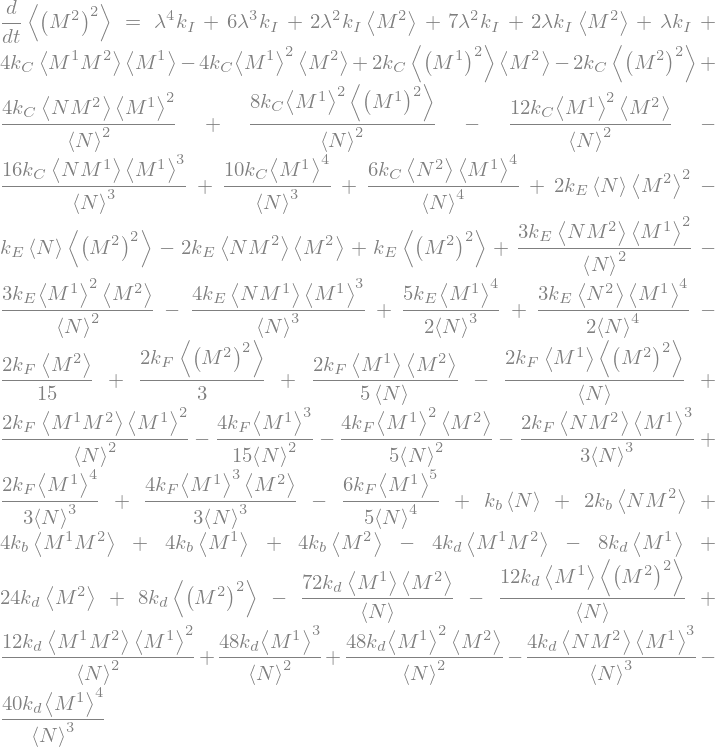

In [5]:
moments = [
    Moment(0),
    Moment(0)**2,
    Moment(1),
    Moment(1)**2
]
display(moments)
equations = automated_moment_equations(1, transitions, moments, lpac=True, order=2)
display_moment_equations(equations)

The LaTeX source of the ODE system can be found and copy-pasted by modifying the Math Render option of the jupyter notebook. This is done by right-clicking on the system and choosing Math Settings > Math Render > Plain Source .

From the closed equations, we can also generate code to simulate the system. Currently, Python or Julia code can be generated.

For a direct code output, the user can rely on the functions:

In [6]:
name = "IEqCFBDq"
julia_code = generate_julia_code(equations, function_name=name)
print(julia_code)
filename=name+".jl"
with open(filename, 'w') as f:
    print(julia_code, file=f)
    print("Code written to file: %s" %(filename))

> Generating ODE body...
>> (1) Generating RHS code for Moment(0,)...
>>> Generating RHS code... [0:00:00.000200]
>>> Generating RHS comments...
>> (2) Generating RHS code for Moment(0)**2...
>>> Generating RHS code... [0:00:00.000365]
>>> Generating RHS comments...
>> (3) Generating RHS code for Moment(1,)...
>>> Generating RHS code... [0:00:00.000194]
>>> Generating RHS comments...
>> (4) Generating RHS code for Moment(1)**2...
>>> Generating RHS code... [0:00:00.000541]
>>> Generating RHS comments...
>> (5) Generating RHS code for Moment(1)*Moment(2)...
>>> Generating RHS code... [0:00:00.002400]
>>> Generating RHS comments...
>> (6) Generating RHS code for Moment(2,)...
>>> Generating RHS code... [0:00:00.000602]
>>> Generating RHS comments...
>> (7) Generating RHS code for Moment(0)*Moment(2)...
>>> Generating RHS code... [0:00:00.001215]
>>> Generating RHS comments...
>> (8) Generating RHS code for Moment(0)*Moment(1)...
>>> Generating RHS code... [0:00:00.000645]
>>> Generating 

# evaluate ODEs
function IEqCFBDq_ODEs(dM, M, parameters, t)
  c4 = parameters[:\lambda] # \lambda
  c2 = parameters[:kC] # kC
  c5 = parameters[:kE] # kE
  c6 = parameters[:kF] # kF
  c0 = parameters[:kI] # kI
  c3 = parameters[:kb] # kb
  c1 = parameters[:kd] # kd
  # Number of Compartments (N)
  dM[1] = c0+c6*M[3]+1/2*c2*M[1]+1/2*c5*M[1]-1/2*c2*M[2]-1/2*c5*M[2]
  # N^2
  dM[2] = c0+c6*M[3]+2*c2*((M[1])^(3))+2*c5*((M[1])^(3))+2*c6*M[8]+2*c0*M[1]-1/2*c2*M[1]-1/2*c5*M[1]+3/2*c2*M[2]+3/2*c5*M[2]-3*c2*M[2]*M[1]-3*c5*M[2]*M[1]
  # Total Mass
  dM[3] = c4*c0+c3*M[1]+c1*M[3]+1/2*c5*M[3]-c1*M[6]-1/2*c5*M[8]
  # M^2
  dM[4] = c4*c0+c5*M[4]+c0*((c4)^(2))+c3*M[1]+1/2*c5*M[7]-2*c1*M[5]-2*c1*M[3]+2*c3*M[8]+2*c1*M[4]+2*c1*M[6]-1/2*c5*M[6]-c5*M[4]*M[1]-2*c5*M[8]*M[3]+2*c4*c0*M[3]+2*c5*((M[3])^(2))*M[1]
  # M*S
  dM[5] = c4*c0+c5*M[5]+c0*((c4)^(3))+c3*M[8]+c3*M[7]+c3*M[1]-c2*M[5]-c1*M[9]-8*c1*M[6]-2*c2*((M[3])^(3))-2*c1*M[4]+2*c3*M[4]+2*c3*M[3]+3*c0*((c4)^(2))+4*c1*M[3]+5*c1*M[5]+1/3*c6*M[5]+c4*c0*M